# Author : Anuradha

In [ ]:
# Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:/7-clustering/Insurance Dataset.csv")

In [2]:
data.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [5]:
data.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [7]:
# Step 1: Data Exploration
print("\nData Information:")
print(data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB
None


In [9]:
print(data.isnull().sum())

Premiums Paid    0
Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64


In [11]:
# there is no missing value
data.dtypes

Premiums Paid      int64
Age                int64
Days to Renew      int64
Claims made      float64
Income             int64
dtype: object

In [17]:
# Normalize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2 = scaler.fit_transform(data)

# Elbo curve

In [20]:
# Initilize variable to store wcss
from sklearn.cluster import KMeans
k_val = range(1,10)
wcss = []
for k in k_val:
    kmeans = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

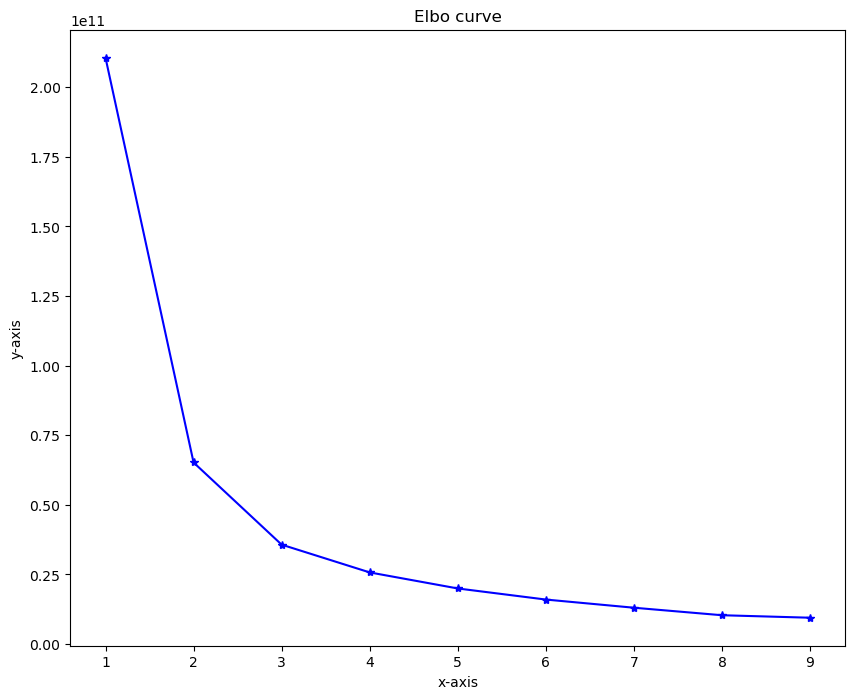

In [22]:
# plot elbo curve 
plt.figure(figsize=(10,8))
plt.plot(k_val,wcss, marker="*", color="blue")
plt.title("Elbo curve")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

# K-Means Clustering

In [26]:
# Initialize KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(data2)
data1 = y_predicted

C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
print(data.head())

   Premiums Paid  Age  Days to Renew  Claims made  Income
0           2800   26            233  3890.076336   28000
1           2950   27            130  2294.444444   29500
2           3100   28            144  2564.545455   31000
3           3250   30             65  1978.260870   32500
4           3400   32             56  2009.090909   34000


In [30]:
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[ 0.05822202 -0.19735242 -0.16459942 -0.17071207  0.31289035]
 [ 1.52593147  1.08119624  0.67911225  1.35674874  1.17265703]
 [-1.00772922 -0.37419276 -0.1771537  -0.57913659 -1.15633295]]


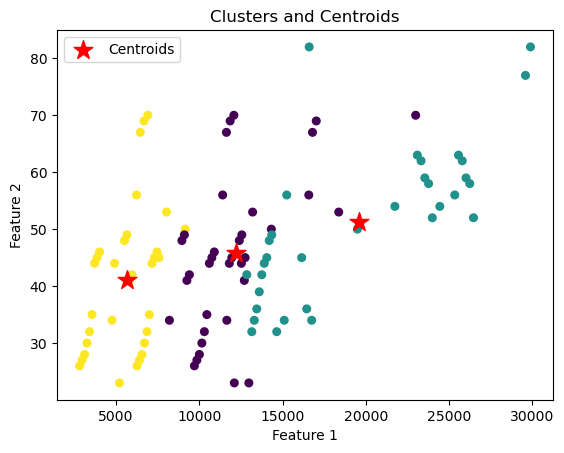

In [34]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_predicted, cmap='viridis', s=30)  # Use .iloc for index-based access
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('Feature 1')  # Replace with the actual column name if available
plt.ylabel('Feature 2')  # Replace with the actual column name if available
plt.legend()
plt.show()